## Part I - Exploratory Analytics: Data related job salaries
## by Viraaj Bhanushali
### Introduction

We will use an AI-jobs salary dataset to work with. In the AI/ ML and Big Data space, AI-jobs gathers salary data anonymously from professionals worldwide and makes it accessible to anyone for use, sharing, and experimentation. New information is added to the data on a regular basis, usually every week. Having data that can better inform one's decisions about what is being paid globally is the main objective. Therefore, hiring managers, recruiters, startup founders, and those who are considering changing careers can all make better informed decisions.
The dataset contains one table structured as follow:
* **work_year**: The year the salary was paid.
* **experience_level**: The experience level in the job during the year with the following possible values:
   * **EN**: Entry-level / Junior
   * **MI**: Mid-level / Intermediate
   * **SE**: Senior-level / Expert
   * **EX**: Executive-level / Director
* **employment_type**: The type of employement for the role:
    * **PT**: Part-time
    * **FT**: Full-time
    * **CT**: Contract
    * **FL**: Freelance
* **job_title**: The role worked in during the year.
* **salary**: The total gross salary amount paid.
* **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
    * **0**: No remote work (less than 20%)
    * **50**: Partially remote
    * **100**: Fully remote (more than 80%)
* **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size**: The average number of people that worked for the company during the year:
    * **S**: less than 50 employees (small)
    * **M**: 50 to 250 employees (medium)
    * **L**: more than 250 employees (large)

## Preliminary Wrangling

In [2]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading in thedataset and describe its properties through the questions below. 


In [3]:
salaries_df = pd.read_csv('E:\downloads\salaries.csv')
# write the shape of thte dataset
print( "There are {} enteries and {} variables".format(salaries_df.shape[0], salaries_df.shape[1]))
# output random samples 
salaries_df.sample(5)

There are 1332 enteries and 11 variables


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
749,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M
1228,2021,EN,FT,Machine Learning Engineer,21844,USD,21844,CO,50,CO,M
507,2022,MI,FT,BI Data Analyst,77000,AUD,53767,AU,100,AU,M
541,2022,SE,FT,Machine Learning Engineer,186000,USD,186000,US,100,US,M
812,2022,MI,FT,Data Engineer,60000,GBP,74313,GB,0,GB,M


## 1. What is the structure of your dataset?
 The dataset contains 1332 employees' salaries for data related jobs from 2020 to 2022. 11 variables   are used to record the salaries. Most variables are qualitative with both ordered and un ordered     factor variables.
 

## 2. What is/are the main feature(s) of interest in your dataset?
  The primary goal of the data is to provide better guidance in regards to what's being paid     globally. We are interested in finding which factors accounts for higher salaries and salary trends within the years.

## 3.What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 We think that the most factor that influence salary is employee experience. Job title, job type,   year of work and company size also affect salary but at a lower extend. But since we are not certain,  we will test the correlation of salaries with the other variables (employee residence and company location).

In [4]:
#Finding out the info of data 
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


You can see that the table does not contain null values ​​and column names do not contain spaces. You can use the data type as is, but with some changes.
Change experience level, company size, and remote rate to ordered categories, and change employment status to unordered categories.

In [5]:
# Verify if there are duplicates and how many they are.
# False = unique entries 
# True = duplicate entries
salaries_df.duplicated().value_counts()

False    1069
True      263
dtype: int64

In [6]:
# Display the of entries for each year for both the whole dataset and the duplicates

duplicates = salaries_df[salaries_df.duplicated()]
print(salaries_df.work_year.value_counts())
duplicates.work_year.value_counts()

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64


2022    260
2021      2
2020      1
Name: work_year, dtype: int64

Regarding table variables, it is logically possible for two or more people to have the same entry. So I can't check if these are duplicates or different entries. Luckily, most of the duplicates were found in his 2022, with the most 2022 entries. Duplicates can be removed.

In [7]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [8]:
# Copy the dataframe before working on
salaries_clean = salaries_df.copy()


In [9]:
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    """ Converts type to category
            parameters:
            var: string, the name of the column to convert type
            ordered: boolean, If false, then the categorical is treated as unordered
            df: dataframe, 
            categories: the ordered list of the category
            
            return: the converted series 
    
    """
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        classes = pd.api.types.CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(classes)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]

In [10]:
#Creating category type 
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022]

salaries_clean['experience_level'] = to_category('experience_level', True, salaries_clean, experience)
salaries_clean['company_size'] = to_category('company_size', True, salaries_clean, company)
salaries_clean['employment_type'] = to_category('employment_type', False, salaries_clean, employment_type)
salaries_clean['remote_ratio'] = to_category('remote_ratio', True, salaries_clean, remote)
salaries_clean['work_year'] = to_category('work_year', True, salaries_clean, year)

# Test types were converted. Dtype should be category
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1332 non-null   category
 1   experience_level    1332 non-null   category
 2   employment_type     1332 non-null   category
 3   job_title           1332 non-null   object  
 4   salary              1332 non-null   int64   
 5   salary_currency     1332 non-null   object  
 6   salary_in_usd       1332 non-null   int64   
 7   employee_residence  1332 non-null   object  
 8   remote_ratio        1332 non-null   category
 9   company_location    1332 non-null   object  
 10  company_size        1332 non-null   category
dtypes: category(5), int64(2), object(4)
memory usage: 69.9+ KB


In [13]:
# Delete duplicates and reset index
salaries_clean.drop_duplicates(inplace= True, ignore_index=True)

In [12]:
# Test duplicates were deleted. result should be 0
salaries_clean.duplicated().sum()

0

In [14]:
salaries_clean.shape

(1069, 11)

In [15]:
# Save the cleaned data in a csv file
salaries_clean.to_csv('salaries_master.csv', index=False)

We are done with the assessment and cleaning. Next, we will start ploting our visualizations

## Univariate Exploration

## What is the distribution of salaries?
We will start with our main variabble of interest; salary. For uniformity in currency, we will exclusively work only with salaries in US dollar.

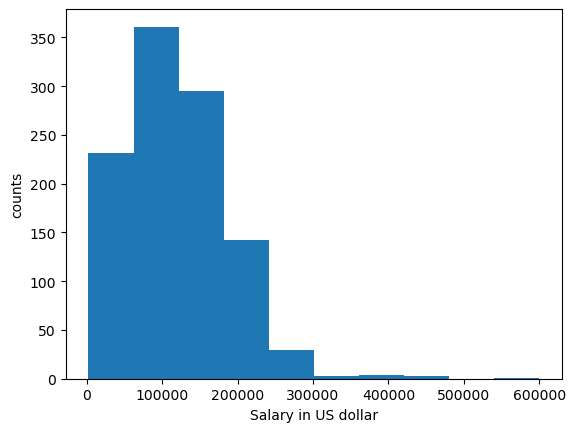

In [16]:
plt.hist(data=salaries_clean, x='salary_in_usd')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts')
plt.show()

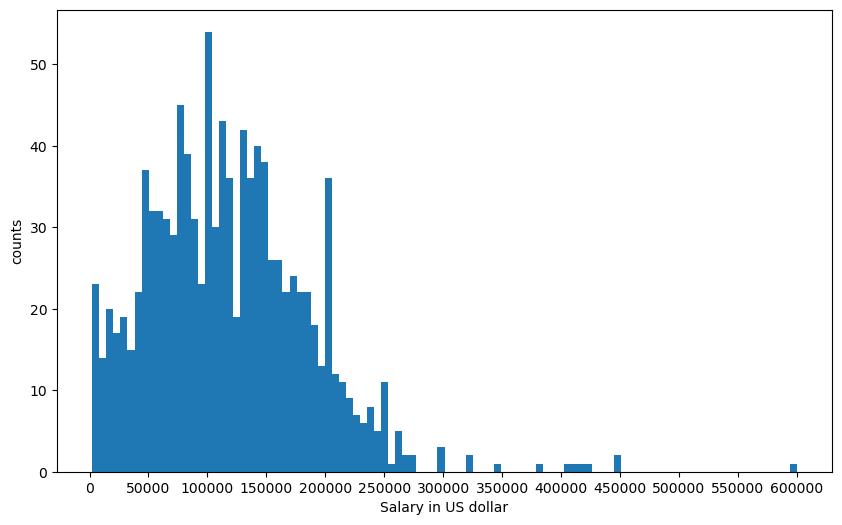

In [17]:
plt.figure(figsize = [10, 6])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

**Observation**: As we could predict, salary has a right-skewed distribution. When the number of bins are increased, the distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 285000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry.

Let's have a closer look at these top salaries which create discontinuity in the distribution.


In [18]:
# collect rows with salaries on the right of the graph
discontinous_salaries = salaries_clean[salaries_clean.salary_in_usd > 275000]
print(discontinous_salaries.shape)
discontinous_salaries.sort_values(by='salary_in_usd', ascending=False)

(15, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1016,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
832,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
889,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
1061,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
987,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
1064,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
773,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
778,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
112,2022,SE,FT,Data Architect,345600,USD,345600,US,0,US,M
1010,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L


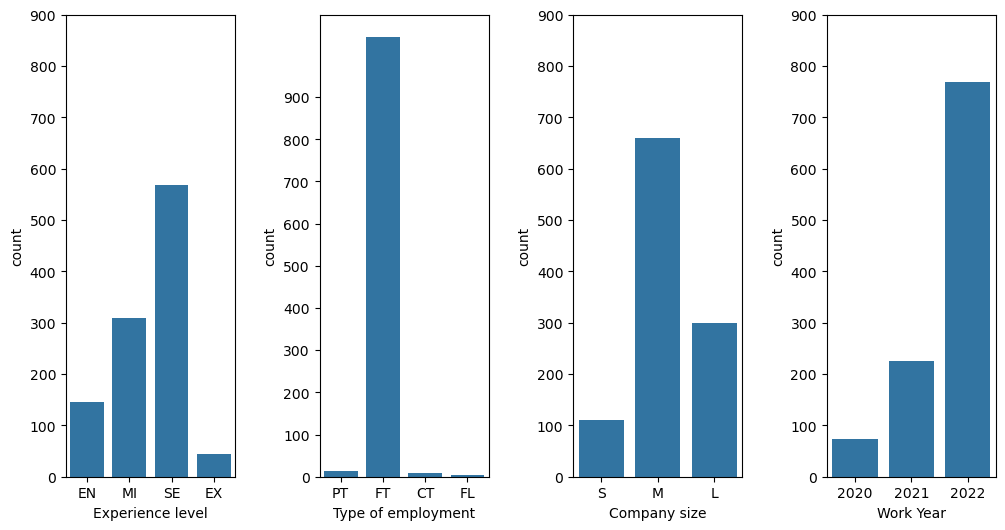

In [19]:
# let's plot all three together to get an idea of each categorical variable's distribution.

fig, ax = plt.subplots(ncols=4, figsize = [12,6])
yticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
default_color = sb.color_palette()[0]
sb.countplot(data = salaries_clean, x = 'experience_level', color = default_color, ax = ax[0]).set(xlabel='Experience level')
ax[0].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'employment_type', color = default_color, ax = ax[1]).set(xlabel='Type of employment')
ax[1].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'company_size', color = default_color, ax = ax[2]).set(xlabel='Company size')
ax[2].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'work_year', color = default_color, ax = ax[3]).set(xlabel='Work Year')
ax[3].set_yticks(yticks)
plt.subplots_adjust(wspace=0.5)
plt.show()

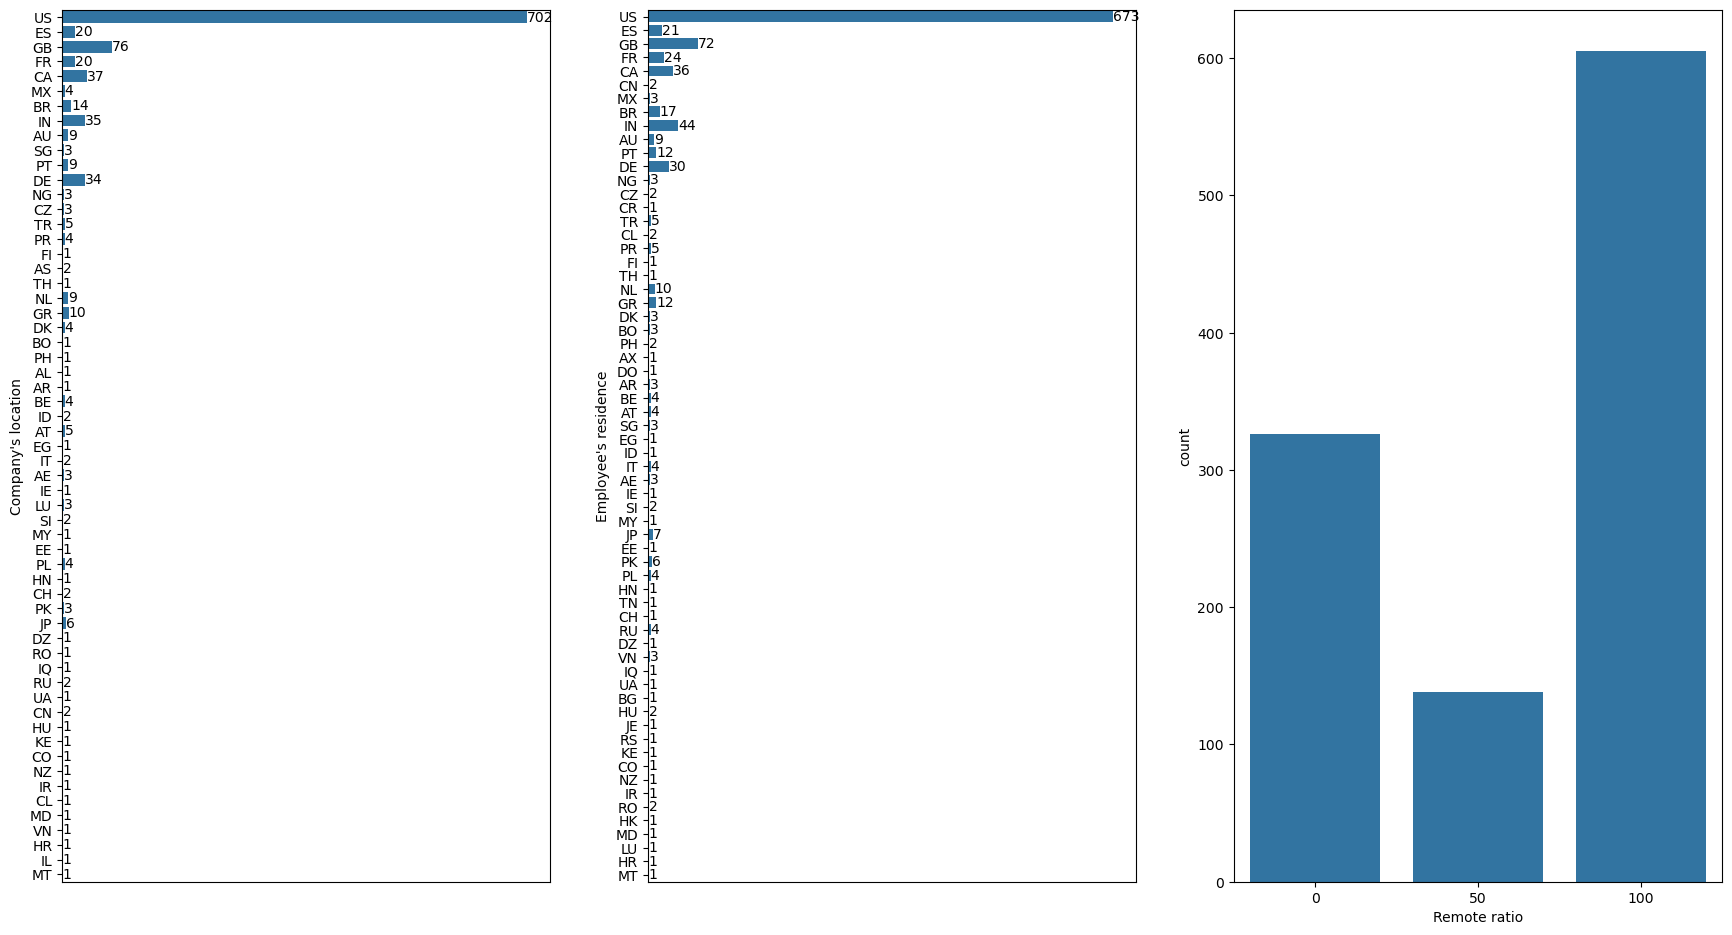

In [20]:
fig, ax = plt.subplots(ncols=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = salaries_clean, y = 'company_location', color = default_color, ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
ax[0].bar_label(ax[0].containers[0])
sb.countplot(data = salaries_clean, y = 'employee_residence', color = default_color, ax = ax[1]).set(
    ylabel="Employee's residence")
ax[1].axes.get_xaxis().set_visible(False)
ax[1].bar_label(ax[1].containers[0])
sb.countplot(data = salaries_clean, x = 'remote_ratio', color = default_color, ax = ax[2]).set(xlabel='Remote ratio')
plt.subplots_adjust(right=2.2, top=1.2)
plt.show()

**Observation**: Companies and employees have the same top five countries: USA, Great Britain, India, Canada and Germany. Most of the jobs are remote



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The salary variable has a right-skewed distribution. Salaries concentrate on the low end of the graph as there are more jobs with low wages than higher wages. After increasing the number of bins, the distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 285000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry. We were concerned about discontinuous points on the graph, but after a deeper look, we concluded that they were correct.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All features under investigation had usual distributions. We changed the data type of some features for data quality reason and make sure only desired operations can be performed on the data. We changed experience level, company size and remote ratio to ordered-category variables and employment type to an unordered category variable.

### Bivariate Exploration
In this section, we investigate relationships between pairs of variables we used in the previous section.

### What is the correlation between salary and categorical variables?
The categorical variables here are variables with a very limited number of possible values they can take. These variables are: experience_level, company_size, employment_type, remote_ratio.

In [21]:
# List of categorical variable
lim_categoric_vars = ['work_year', 'experience_level', 'company_size', 'employment_type', 'remote_ratio']
categoric_vars = ['company_location', 'employee_residence', 'job_title']

In [22]:
def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

<Figure size 1000x1000 with 0 Axes>

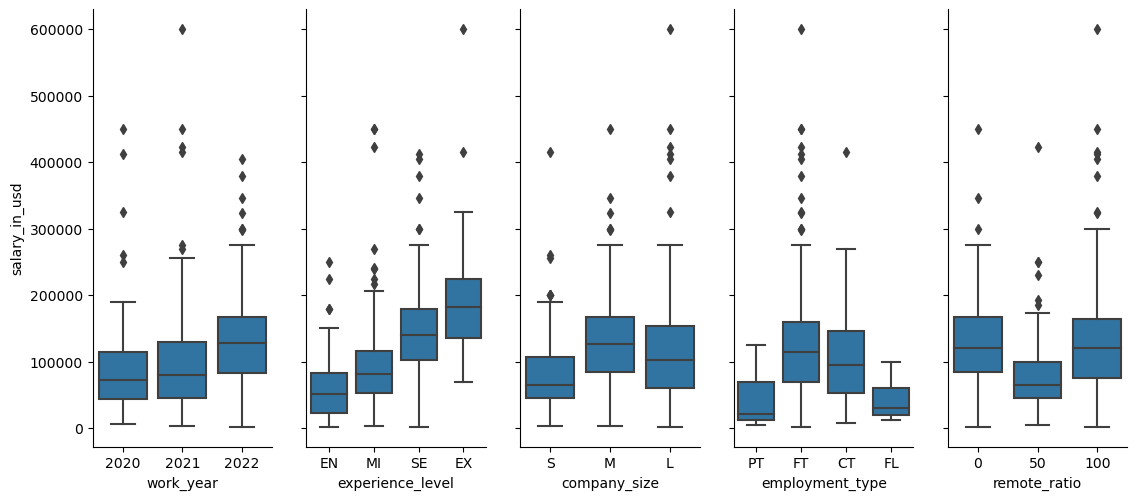

In [23]:
# plot matrix of salary in US dollar against categorical features.
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = salaries_clean, y_vars = ['salary_in_usd'], x_vars = lim_categoric_vars, aspect = 1)
g.map(boxgrid)
g.fig.set_size_inches(8,6)
plt.subplots_adjust(right=1.35)
plt.show()

**Observation**: Salaries have globally increasing through years. As expected salaries increases with an increase in experience. Medium companies turn to pay higher average wages than any other company but large companies have more outliers with high wages. Complete remote and onsite jobs turn to have higher wages than patial remote jobs. Among the three categorical variables, experience level has the strongest correlation with salary

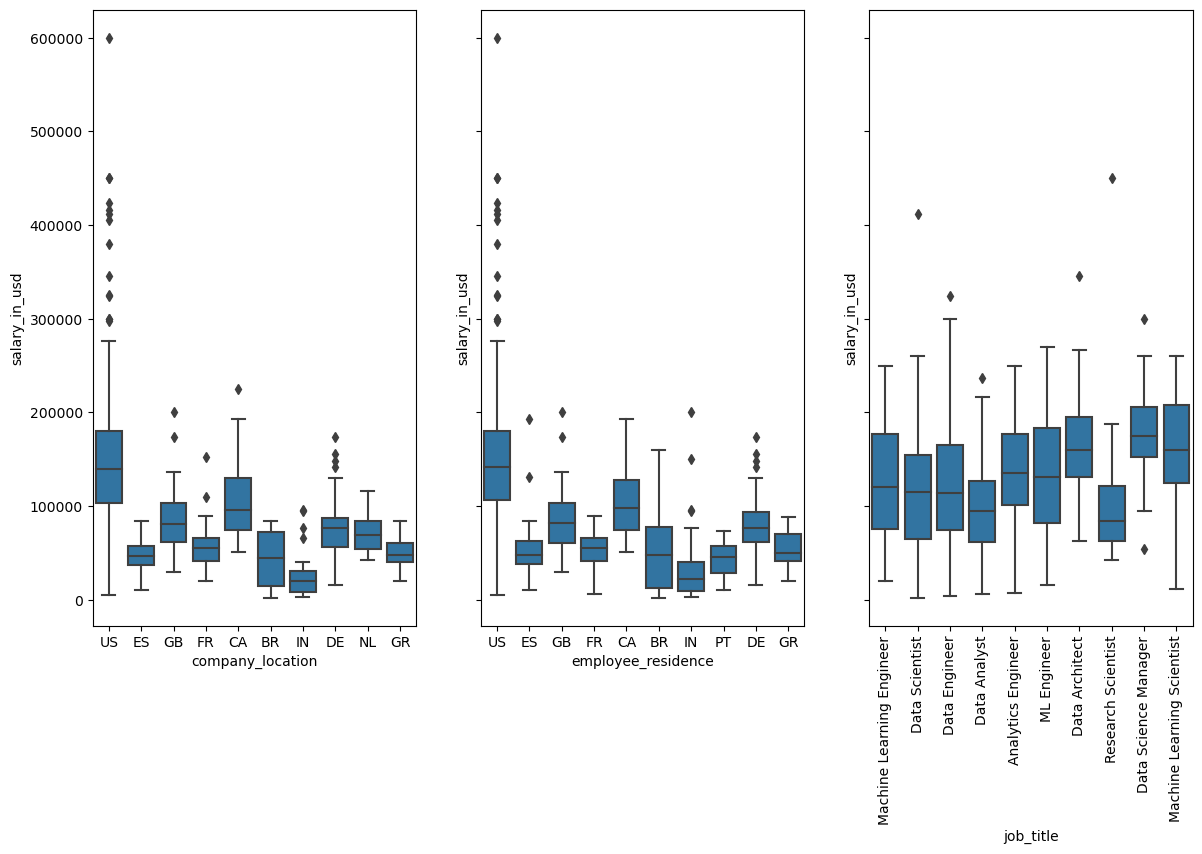

In [24]:
fig, ax = plt.subplots(ncols=3, figsize = [8,8], sharey=True)
count = 0
# loop through qualittive values with too many values to select top 10 and plot a box plot
for var in categoric_vars:
    z = salaries_clean[var].value_counts().head(10)
    #print(salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)])
    sb.boxplot(data = salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)], color = default_color,
               x = var, y = "salary_in_usd", ax = ax[count])
    count+= 1

ax[count-1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(right=1.5)

**Observation**: Companies in the united states of America (USA) offer the highest wages. Employees living in USA are better paid than those in any other country. The correlation between the job role and the salary is weak.

### What are the relationships between categorical variables?
It will be cumbersome to plot the relationships between all the 8 variables. I will choose relationships we beleive important for our initial question; which factor greatly influence the salary of a worker and the trend with the years.

From the above relations with salary, experience level, company location, work year have a faily strong relationship with salary.


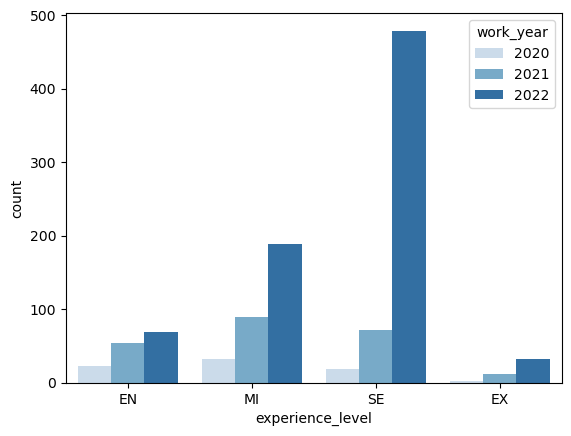

In [26]:
# since there's only three subplots to create, using the full data should be fine.
#plt.figure(figsize = [8,8])
# work year vs experience level
sb.countplot(data = salaries_clean, x = 'experience_level', hue = 'work_year', palette = 'Blues')
plt.show()

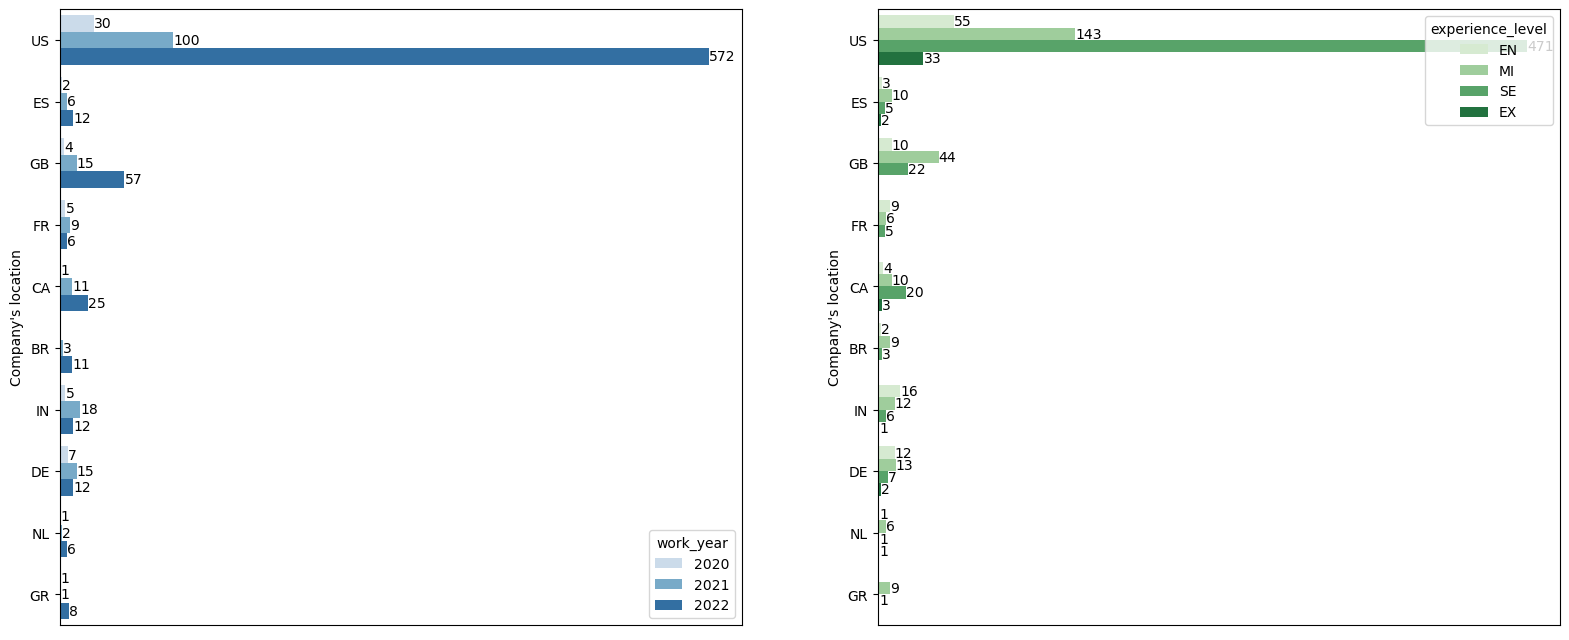

In [27]:
# We will consider the top 10 because above the number companies are too small
z = salaries_clean['company_location'].value_counts().head(10)
company_10 = salaries_clean[salaries_clean['company_location'].apply(lambda x: x in z.index)]
fig, ax = plt.subplots(ncols=2, figsize = [8,8])

# subplot 1: company location vs work year
sb.countplot(data = company_10, y = 'company_location', hue = 'work_year', palette = 'Blues',
             ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
for x in range(len(ax[0].containers)):
    ax[0].bar_label(ax[0].containers[x])

# subplot 2: company location vs experience level
sb.countplot(data = company_10, y = 'company_location', hue = 'experience_level', palette = 'Greens',
             ax = ax[1]).set(ylabel="Company's location")
ax[1].axes.get_xaxis().set_visible(False)

for x in range(len(ax[1].containers)):
    ax[1].bar_label(ax[1].containers[x])
    
plt.subplots_adjust(right=2)


plt.show()

**Observation**: There is an increase in the experience level over years with a boom on senio-level/expert. Globally, there is an increase in the number of companies in every country over years with a peak in US. Companies employ mostly senior-level/expert and mid-level/intermediate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
As expected, there is a strong correlation between salary and the experience level of the employee. The box plot of salary against the experience level looks like linear relationship. It was interestly surprising to see that medium companies turn to pay better salaries than large companies

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The company's location have insignificant correlation with the expeience level. So no further exploration. A positive corrolation between experience level and work year. The experience level that seems to have much influence on salary turns to be influence by the work year. In the section below we will have a deeper look on the relation between this three variables.

### Multivariate Exploration
Salary, experience level and work year have an interesting relationship that we want to explore further

**Question: What is the relationship between salary, experience and work year?**
Let's look at how Salary, experience and work year are related.

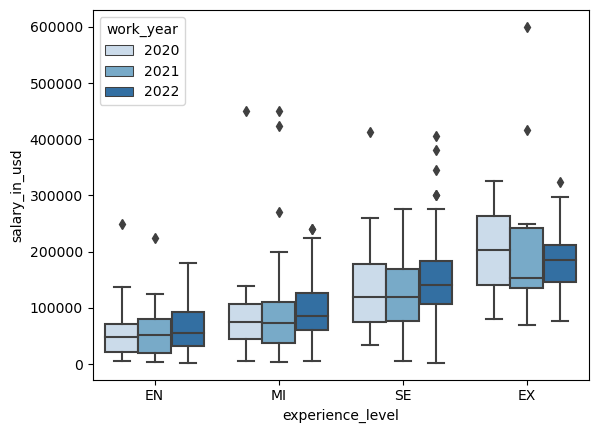

In [28]:
# plot matrix of salary in US dollar against categorical features.
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

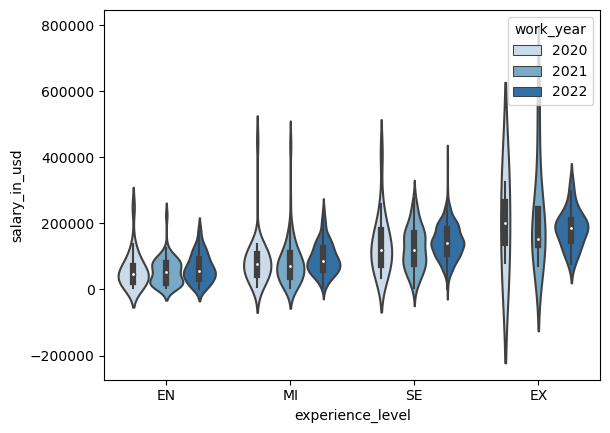

In [29]:
# plot matrix of salary in US dollar against categorical features.
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

**Observation**: From the box plot it is difficult to clearly see the changes between salary and experience level over year, especially for 2020 and 2021. With the propability density on the violin plot, we notice that for each experience level, the probability density increases over years.

Let's consider only the top 10 jobs which make 79.14% of our cleaned data. This will held reduce the noice on the plots.

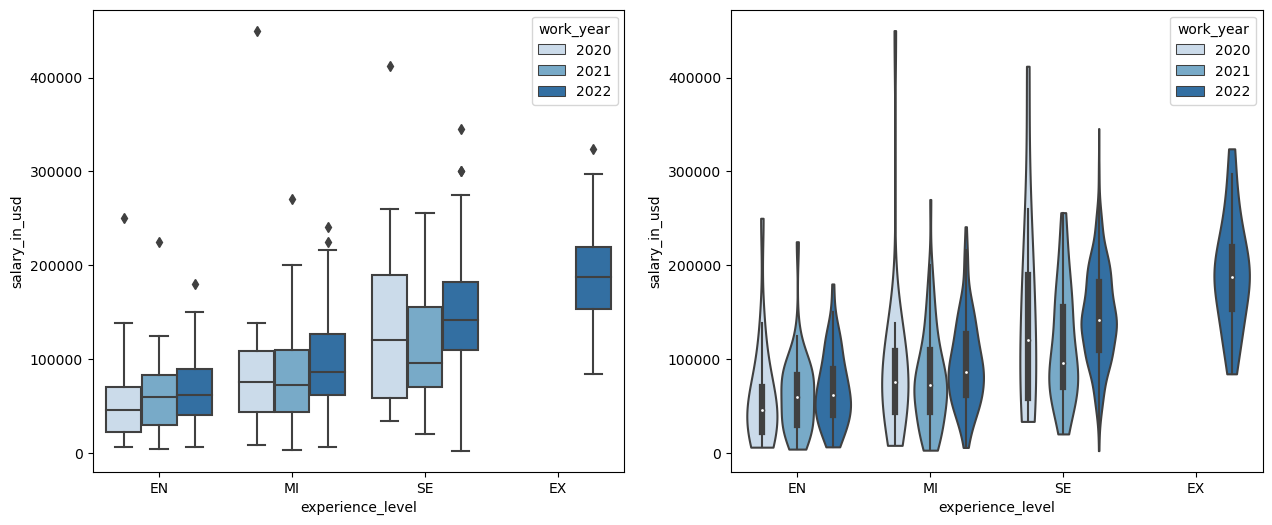

In [30]:
z = salaries_clean['job_title'].value_counts().head(10)
job_10 = salaries_clean[salaries_clean['job_title'].apply(lambda x: x in z.index)]


fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.subplots_adjust(right=1.1)
plt.show();

Outliners have reduce and we have a better perception on changes over years. For the top job titles in the data set, Executive-level / Director exist only for 2022.

Let's have a look on the Executive-level / Director jobs

In [31]:
Ex_exp = job_10[job_10['experience_level'].str.contains('EX')]
Ex_exp.job_title.value_counts()

Data Engineer                 8
Analytics Engineer            6
Data Science Manager          4
Machine Learning Scientist    2
Data Analyst                  2
Research Scientist            1
Name: job_title, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Among all the features only experience level and work year turn to have a pretty strong relationship with salaries. When we looked at the correlation bewteen the experience level and the work year, we found that the count of each experience level value increases over year with a boom in 2022 for senior-level.

### Were there any interesting or surprising interactions between features?
Regarding the strong correlation between work year and experience level, and experience level with salary, we thought when placing the three features on a single plot we will have an easy-to-read strong relationship


# Conclusions
We found that among our features, experience has the strongest positive relationship with salary. Experience itself is influence by the work year. When the three features are plotted on a single graph, it is difficult to percieve the relationship. Maybe with a larger dataset the

# Part II - Communicate Findings: Effect of experience level on salary over years

## Investigation Overview
In this investigation, we wanted to look at the factors that affect the salary over year in the data science industry. The main focus was on experience level and work year.

## Dataset Overview
The salaries dataset we will work with is from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis. The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

In [32]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Distribution of salaries
Salary has a right-skewed distribution. The distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 285000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry

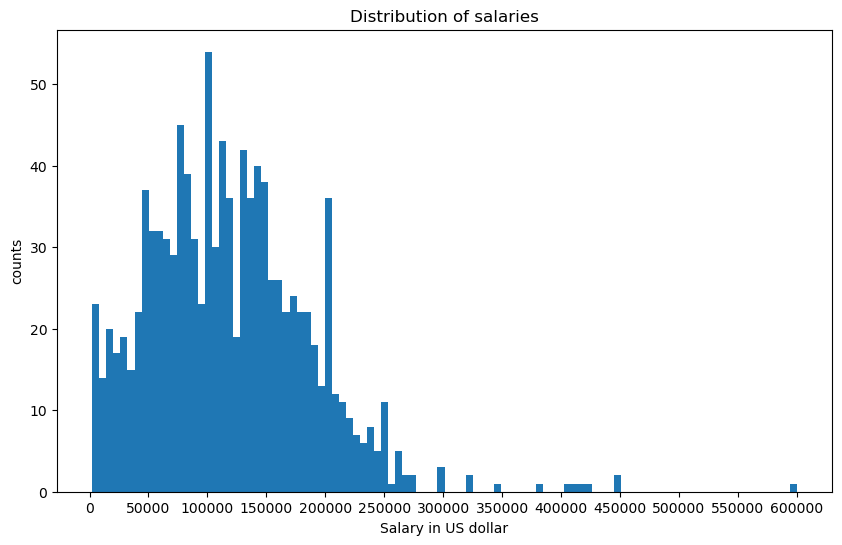

In [33]:
plt.figure(figsize = [10, 6])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.title('Distribution of salaries')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

### Salary vs Experience level
Plotting salary against experience level produces a strong linear relationship. As experience level increases from the lower of entery level to the highest at Executive-level/Director the salary increases too even though there are outliners who don't follow the trend.

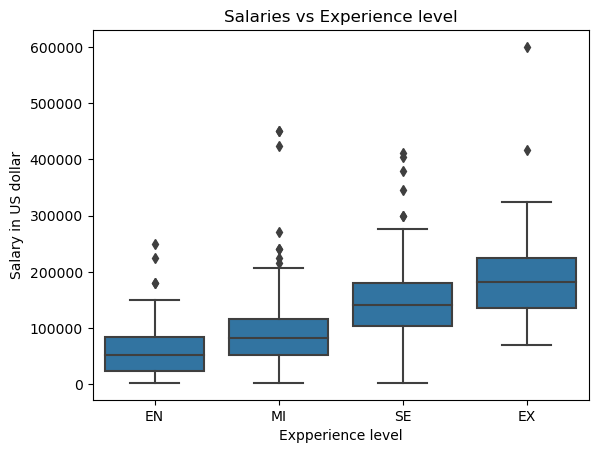

In [34]:
blue_color = sb.color_palette()[0]
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', color=blue_color)
plt.title('Salaries vs Experience level')
plt.ylabel('Salary in US dollar')
plt.xlabel('Expperience level');
plt.show();

### Salary vs Work year¶
Weaker than the relationship between salary and experience level, salary also has a positive linear relation with work year. Globally salaries increases with years though not at the same rate.

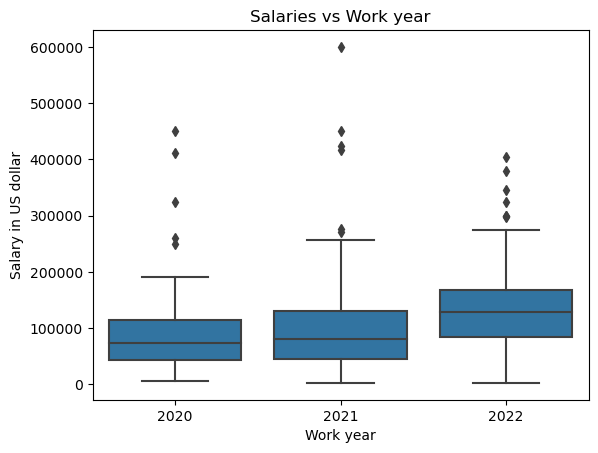

In [35]:
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'work_year', color=blue_color)
plt.title('Salaries vs Work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Work year');
plt.show();

### Salary by experience level and work year

From the box plot it is difficult to clearly see the changes between salary and experience level over year, especially for 2020 and 2021. With the propability density on the violin plot, we notice that for each experience level, the probability density increases over years.

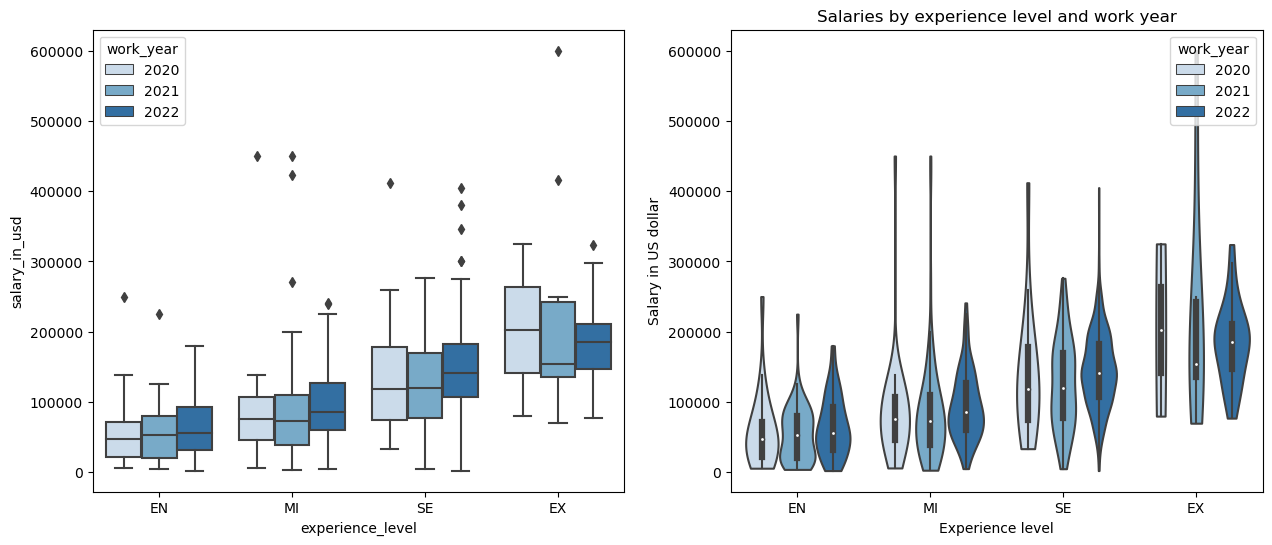

In [36]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();

### Salary by experience level and work year for the top 10 job titles¶
When we consider only the top 10 job titles which make 78.31% of our dataset, we notice that only 2022 have Executive-level / Director rows. With the probability density and the position of the median on the violin plot of the top 10 job titles we observe an increase in the salary as we move lower experience level to the higher experience level over years.

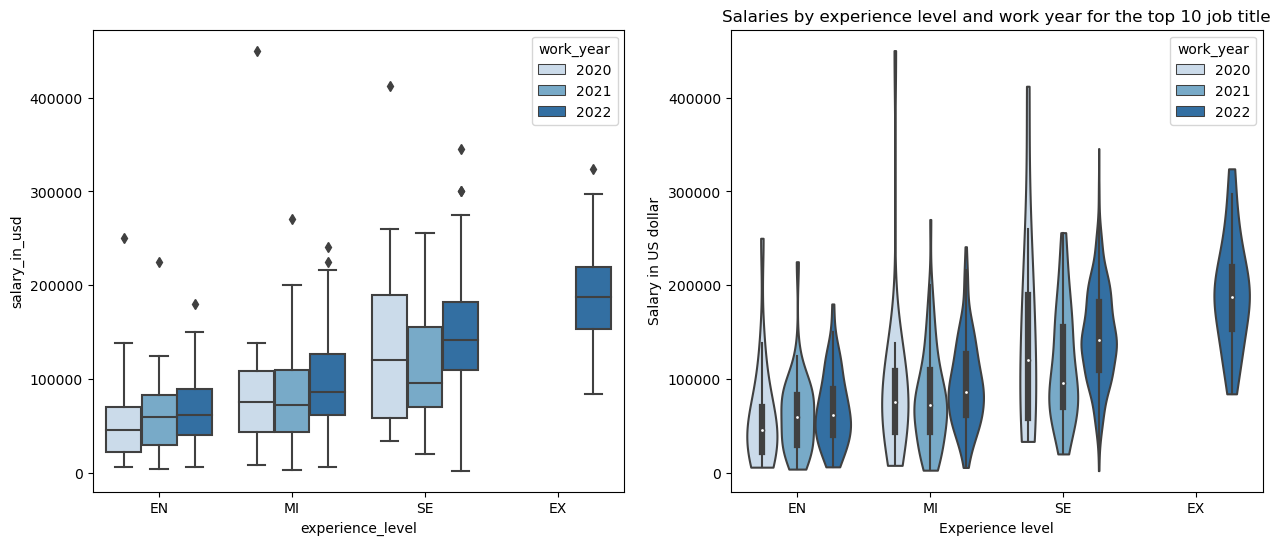

In [37]:
z = salaries_clean['job_title'].value_counts().head(10)
job_10 = salaries_clean[salaries_clean['job_title'].apply(lambda x: x in z.index)]


fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year for the top 10 job title')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();
